# Interpolation of Cloud Atmosphere using scipy.interpolate.griddata

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from scipy.interpolate import griddata
sns.set_style("whitegrid")
# plt.style.use('classic')
# plt.style.use('seaborn-whitegrid')

## Creating a interpolation graph for cloud in atmosphere

> Using a cloud in an atmosphere

In [2]:
# "../create_atm/atmospheres/cloud_atm_1-2.csv"
# "../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.csv"
df_cloud = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.csv", header = None, index_col = 0) 
N_cloud = int(df_cloud.shape[1]/2)

In [3]:
dft_cloud = df_cloud.T

In [4]:
effr_cloud = [4,8,10,16,20,32] 

In [5]:
dTau_range_cloud = []

for col in dft_cloud.columns:
    dTau_range_cloud.append(col)

N_dTau_cloud = len(dTau_range_cloud)

# print(dTau_range_cloud)

In [6]:
df_index_log = np.log(df_cloud.index)
# df_index_log

## Interpolating using griddata routine

### Effective Radius interpolation

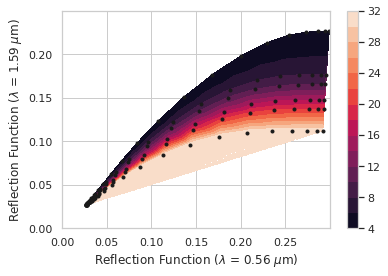

In [7]:
dft_numpy = dft_cloud.to_numpy()

x_effr = dft_numpy[0]
for i in range(N_cloud-1):
    x_effr = np.concatenate([x_effr, dft_numpy[i+1]])

y_effr = dft_numpy[N_cloud]
for i in range(N_cloud-1):
    y_effr = np.concatenate([y_effr, dft_numpy[i+1+N_cloud]])

z_effr = np.concatenate([np.ones(N_dTau_cloud)*4, np.ones(N_dTau_cloud)*8, np.ones(N_dTau_cloud)*10, np.ones(N_dTau_cloud)*16, np.ones(N_dTau_cloud)*20, np.ones(N_dTau_cloud)*32])
z_effr = np.log10(z_effr)

xi_effr = np.arange(0,0.3,0.0001)
yi_effr = np.arange(0,0.25,0.0001)
xi_effr,yi_effr = np.meshgrid(xi_effr,yi_effr)

zi_effr = griddata((x_effr,y_effr),z_effr,(xi_effr,yi_effr),method='linear')

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_effr,y_effr,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi_effr, yi_effr, 10**zi_effr, levels=14)

plt.colorbar(cntr1)
plt.show()

## Optical Depth Interpolation

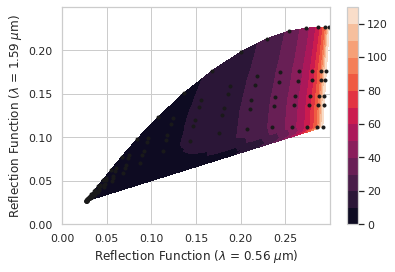

In [8]:
df_numpy = df_cloud.to_numpy()

x_opd = df_numpy[0][0:N_cloud]
for i in range(N_dTau_cloud-1):
    x_opd = np.concatenate([x_opd, df_numpy[i+1][0:N_cloud]])

y_opd = df_numpy[0][N_cloud:2*N_cloud]
for i in range(N_dTau_cloud-1):
    y_opd = np.concatenate([y_opd, df_numpy[i+1][N_cloud:2*N_cloud]])

z_opd = np.ones(N_cloud)*df_cloud.index[0]
for i in range(N_dTau_cloud-1):
    z_opd = np.concatenate([z_opd, np.ones(N_cloud)*df_cloud.index[i+1]])

z_opd = np.log10(z_opd)

xi_opd = np.arange(0,0.3,0.0001)
yi_opd = np.arange(0,0.25,0.0001)
xi_opd,yi_opd = np.meshgrid(xi_opd,yi_opd)

zi_opd = griddata((x_opd,y_opd),z_opd,(xi_opd,yi_opd),method='linear')

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.contourf(xi,yi,zi) # np.arange(0.18,0.2,0.001)
plt.plot(x_opd,y_opd,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi_opd, yi_opd, 10**zi_opd, levels=14)

plt.colorbar(cntr1)
plt.show()

# Investigating Aerosol Above Cloud

In [9]:
# "../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.1.csv"
# "../create_atm/atmospheres/aerosol_cloud_atm_0_0.01.csv"
# df_cloud_0 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.1.csv", header = None, index_col = 0)

In [14]:
# df_70 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.1.csv", header = None, index_col = 0)
# df_76 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.1.csv", header = None, index_col = 0)
# df_77 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.1.csv", header = None, index_col = 0)
# df_79 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.1.csv", header = None, index_col = 0)

> dust aerosol

In [11]:
df_70_0p02 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.02.csv", header = None, index_col = 0)
df_70_0p04 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.04.csv", header = None, index_col = 0)
df_70_0p06 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.06.csv", header = None, index_col = 0)
df_70_0p08 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.08.csv", header = None, index_col = 0)
df_70_0p10 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.1.csv", header = None, index_col = 0)

In [12]:
#df_cloud

In [13]:
## averaged noise in 0.55 micron channel is 2.4%
## averaged noise in 1.6 micron channel is 3.2%

noise_v = 0.024
noise_ir = 0.032

# x_err_70 = dft_70_numpy[1]* noise_v
# y_err_70 = dft_70_numpy[1+N_cloud]* noise_ir

x_err_cloud = dft_numpy[1] * noise_v
y_err_cloud = dft_numpy[1+N_cloud] * noise_ir

In [56]:
# plt.plot(df_70[2+1], df_70[2+1+N_cloud])
# plt.plot(df_76[2+1], df_76[2+1+N_cloud])
# plt.plot(df_77[2+1], df_77[2+1+N_cloud])
# plt.plot(df_79[2+1], df_79[2+1+N_cloud])


# plt.legend(['Dust (a70)','Clean Maritime (a76)','Dirty Maritime (a77)','Smoke (a79)'], title='aerosol ($\mu$m)')

# for i in range(N_cloud):
#     if i == 2:
#         plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=2, capthick=1, ecolor='black') # , linestyle = 'dashed'
#     else:
#         plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], 'k', linestyle = 'dashed')
    
# #plt.legend(effr_cloud, title='effective radius ($\mu$m)')
# plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
# plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
# plt.show()

In [14]:
dTau_range_cloud = []

for col in dft_cloud.columns:
    dTau_range_cloud.append(col)

print(dTau_range_cloud)

[0.125, 0.1767766952966369, 0.25, 0.3535533905932738, 0.5, 0.7071067811865476, 1.0, 1.4142135623730951, 2.0, 2.8284271247461903, 4.0, 5.656854249492381, 8.0, 11.31370849898476, 16.0, 22.62741699796952, 32.0, 45.254833995939045, 64.0, 90.50966799187808, 128.0]


In [36]:
effr_aerosol = [0.02,0.04,0.06,0.08,0.1]

(0.022, 0.24)

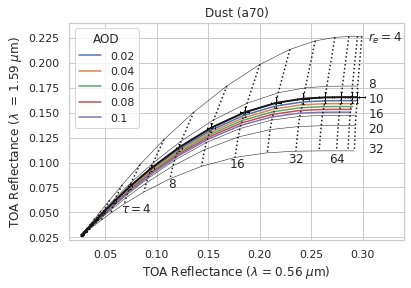

In [55]:
# plot perturbations
plt.plot(df_70_0p02[2+1], df_70_0p02[2+1+N_cloud])
plt.plot(df_70_0p04[2+1], df_70_0p04[2+1+N_cloud])
plt.plot(df_70_0p06[2+1], df_70_0p06[2+1+N_cloud])
plt.plot(df_70_0p08[2+1], df_70_0p08[2+1+N_cloud])
plt.plot(df_70_0p10[2+1], df_70_0p10[2+1+N_cloud])


# plot grid
## effective radius
N_dTau_cloud = len(dTau_range_cloud)

# fig, ax = plt.subplots()

for i in range(N_cloud):
    if i == 2:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 2)
        plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=1, capthick=1, ecolor='black', linewidth = 1)
    else:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 0.5)
# plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# plt.plot(df_cloud_atm[6], df_cloud_atm[12])

#plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
plt.xlabel('TOA Reflectance ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('TOA Reflectance ($\lambda$  = 1.59 $\mu$m)')

## optical depth
for i in range(N_dTau_cloud):
    x = dft_cloud[dTau_range_cloud[i]][:N_cloud]
    y = dft_cloud[dTau_range_cloud[i]][N_cloud:2*N_cloud]
    
    plt.plot(x,y, color = 'k',linestyle =':', linewidth = 1.5)


# plot details
plt.title("Dust (a70)")
plt.legend(effr_aerosol, title='AOD')
# effective radii
plt.text(0.305, 0.221, '$r_{e}=4$')
plt.text(0.305, 0.175, '$8$')
plt.text(0.305, 0.16, '$10$')
plt.text(0.305, 0.145, '$16$')
plt.text(0.305, 0.13, '$20$')
plt.text(0.305, 0.11, '$32$')

# effective radii
plt.text(0.065, 0.05, r'$\tau = 4$')
plt.text(0.111, 0.075, '$8$')
plt.text(0.17, 0.095, '$16$')
plt.text(0.228, 0.1, '$32$')
plt.text(0.267, 0.1, '$64$')

# plot regions
plt.xlim(0.015,0.34)
plt.ylim(0.022,0.24)

> other aerosols

In [64]:
df_76_0p02 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.02.csv", header = None, index_col = 0)
df_76_0p04 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.04.csv", header = None, index_col = 0)
df_76_0p06 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.06.csv", header = None, index_col = 0)
df_76_0p08 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.08.csv", header = None, index_col = 0)
df_76_0p10 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.1.csv", header = None, index_col = 0)

In [65]:
df_77_0p02 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.02.csv", header = None, index_col = 0)
df_77_0p04 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.04.csv", header = None, index_col = 0)
df_77_0p06 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.06.csv", header = None, index_col = 0)
df_77_0p08 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.08.csv", header = None, index_col = 0)
df_77_0p10 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.1.csv", header = None, index_col = 0)

In [66]:
df_79_0p02 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.02.csv", header = None, index_col = 0)
df_79_0p04 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.04.csv", header = None, index_col = 0)
df_79_0p06 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.06.csv", header = None, index_col = 0)
df_79_0p08 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.08.csv", header = None, index_col = 0)
df_79_0p10 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.1.csv", header = None, index_col = 0)

(0.022, 0.24)

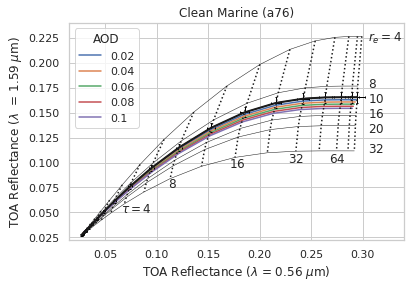

In [67]:
# plot perturbations
plt.plot(df_76_0p02[2+1], df_76_0p02[2+1+N_cloud])
plt.plot(df_76_0p04[2+1], df_76_0p04[2+1+N_cloud])
plt.plot(df_76_0p06[2+1], df_76_0p06[2+1+N_cloud])
plt.plot(df_76_0p08[2+1], df_76_0p08[2+1+N_cloud])
plt.plot(df_76_0p10[2+1], df_76_0p10[2+1+N_cloud])


# plot grid
## effective radius
N_dTau_cloud = len(dTau_range_cloud)

# fig, ax = plt.subplots()

for i in range(N_cloud):
    if i == 2:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 2)
        plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=1, capthick=1, ecolor='black', linewidth = 1)
    else:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 0.5)
# plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# plt.plot(df_cloud_atm[6], df_cloud_atm[12])

#plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
plt.xlabel('TOA Reflectance ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('TOA Reflectance ($\lambda$  = 1.59 $\mu$m)')

## optical depth
for i in range(N_dTau_cloud):
    x = dft_cloud[dTau_range_cloud[i]][:N_cloud]
    y = dft_cloud[dTau_range_cloud[i]][N_cloud:2*N_cloud]
    
    plt.plot(x,y, color = 'k',linestyle =':', linewidth = 1.5)


# plot details
plt.title("Clean Marine (a76)")
plt.legend(effr_aerosol, title='AOD')
# effective radii
plt.text(0.305, 0.221, '$r_{e}=4$')
plt.text(0.305, 0.175, '$8$')
plt.text(0.305, 0.16, '$10$')
plt.text(0.305, 0.145, '$16$')
plt.text(0.305, 0.13, '$20$')
plt.text(0.305, 0.11, '$32$')

# effective radii
plt.text(0.065, 0.05, r'$\tau = 4$')
plt.text(0.111, 0.075, '$8$')
plt.text(0.17, 0.095, '$16$')
plt.text(0.228, 0.1, '$32$')
plt.text(0.267, 0.1, '$64$')

# plot regions
plt.xlim(0.015,0.34)
plt.ylim(0.022,0.24)

(0.022, 0.24)

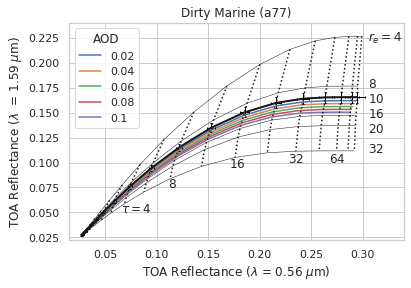

In [68]:
# plot perturbations
plt.plot(df_77_0p02[2+1], df_77_0p02[2+1+N_cloud])
plt.plot(df_77_0p04[2+1], df_77_0p04[2+1+N_cloud])
plt.plot(df_77_0p06[2+1], df_77_0p06[2+1+N_cloud])
plt.plot(df_77_0p08[2+1], df_77_0p08[2+1+N_cloud])
plt.plot(df_77_0p10[2+1], df_77_0p10[2+1+N_cloud])


# plot grid
## effective radius
N_dTau_cloud = len(dTau_range_cloud)

# fig, ax = plt.subplots()

for i in range(N_cloud):
    if i == 2:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 2)
        plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=1, capthick=1, ecolor='black', linewidth = 1)
    else:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 0.5)
# plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# plt.plot(df_cloud_atm[6], df_cloud_atm[12])

#plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
plt.xlabel('TOA Reflectance ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('TOA Reflectance ($\lambda$  = 1.59 $\mu$m)')

## optical depth
for i in range(N_dTau_cloud):
    x = dft_cloud[dTau_range_cloud[i]][:N_cloud]
    y = dft_cloud[dTau_range_cloud[i]][N_cloud:2*N_cloud]
    
    plt.plot(x,y, color = 'k',linestyle =':', linewidth = 1.5)


# plot details
plt.title("Dirty Marine (a77)")
plt.legend(effr_aerosol, title='AOD')
# effective radii
plt.text(0.305, 0.221, '$r_{e}=4$')
plt.text(0.305, 0.175, '$8$')
plt.text(0.305, 0.16, '$10$')
plt.text(0.305, 0.145, '$16$')
plt.text(0.305, 0.13, '$20$')
plt.text(0.305, 0.11, '$32$')

# effective radii
plt.text(0.065, 0.05, r'$\tau = 4$')
plt.text(0.111, 0.075, '$8$')
plt.text(0.17, 0.095, '$16$')
plt.text(0.228, 0.1, '$32$')
plt.text(0.267, 0.1, '$64$')

# plot regions
plt.xlim(0.015,0.34)
plt.ylim(0.022,0.24)

(0.022, 0.24)

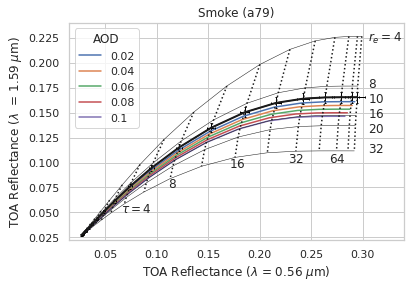

In [70]:
# plot perturbations
plt.plot(df_79_0p02[2+1], df_79_0p02[2+1+N_cloud])
plt.plot(df_79_0p04[2+1], df_79_0p04[2+1+N_cloud])
plt.plot(df_79_0p06[2+1], df_79_0p06[2+1+N_cloud])
plt.plot(df_79_0p08[2+1], df_79_0p08[2+1+N_cloud])
plt.plot(df_79_0p10[2+1], df_79_0p10[2+1+N_cloud])


# plot grid
## effective radius
N_dTau_cloud = len(dTau_range_cloud)

# fig, ax = plt.subplots()

for i in range(N_cloud):
    if i == 2:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 2)
        plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=1, capthick=1, ecolor='black', linewidth = 1)
    else:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 0.5)
# plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# plt.plot(df_cloud_atm[6], df_cloud_atm[12])

#plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
plt.xlabel('TOA Reflectance ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('TOA Reflectance ($\lambda$  = 1.59 $\mu$m)')

## optical depth
for i in range(N_dTau_cloud):
    x = dft_cloud[dTau_range_cloud[i]][:N_cloud]
    y = dft_cloud[dTau_range_cloud[i]][N_cloud:2*N_cloud]
    
    plt.plot(x,y, color = 'k',linestyle =':', linewidth = 1.5)


# plot details
plt.title("Smoke (a79)")
plt.legend(effr_aerosol, title='AOD')
# effective radii
plt.text(0.305, 0.221, '$r_{e}=4$')
plt.text(0.305, 0.175, '$8$')
plt.text(0.305, 0.16, '$10$')
plt.text(0.305, 0.145, '$16$')
plt.text(0.305, 0.13, '$20$')
plt.text(0.305, 0.11, '$32$')

# effective radii
plt.text(0.065, 0.05, r'$\tau = 4$')
plt.text(0.111, 0.075, '$8$')
plt.text(0.17, 0.095, '$16$')
plt.text(0.228, 0.1, '$32$')
plt.text(0.267, 0.1, '$64$')

# plot regions
plt.xlim(0.015,0.34)
plt.ylim(0.022,0.24)

In [35]:
df_cloud

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
0.125000,0.027324,0.026969,0.026989,0.026938,0.026905,0.026845,0.027779,0.027229,0.027044,0.026746,0.026700,0.026565
0.176777,0.028088,0.027588,0.027614,0.027536,0.027491,0.027410,0.028723,0.027955,0.027695,0.027281,0.027210,0.027011
0.250000,0.029156,0.028462,0.028492,0.028379,0.028314,0.028200,0.030061,0.028977,0.028624,0.028033,0.027930,0.027649
0.353553,0.030661,0.029694,0.029728,0.029560,0.029472,0.029308,0.031939,0.030420,0.029934,0.029110,0.028950,0.028546
0.500000,0.032771,0.031441,0.031457,0.031212,0.031084,0.030856,0.034597,0.032455,0.031795,0.030631,0.030386,0.029798
0.707107,0.035744,0.033907,0.033893,0.033529,0.033338,0.033022,0.038356,0.035331,0.034434,0.032805,0.032423,0.031568
1.000000,0.039924,0.037405,0.037317,0.036770,0.036506,0.036054,0.043696,0.039388,0.038175,0.035891,0.035305,0.034042
1.414214,0.045859,0.042407,0.042180,0.041348,0.040969,0.040333,0.051337,0.045118,0.043492,0.040309,0.039393,0.037514
2.000000,0.054352,0.049630,0.049160,0.047911,0.047372,0.046477,0.062231,0.053234,0.051028,0.046613,0.045214,0.042397


In [ ]:
effr_cloud

In [ ]:
df2_cloud_0 = df_cloud_0.T

In [ ]:
df2_numpy_0 = df2_cloud_0.to_numpy()

xi_effr_0 = df2_numpy_0[0]
for i in range(N_cloud_atm-1):
    xi_effr_0 = np.concatenate([xi_effr_0, df2_numpy_0[i+1]])

yi_effr_0 = df2_numpy_0[N_cloud_atm]
for i in range(N_cloud_atm-1):
    yi_effr_0 = np.concatenate([yi_effr_0, df2_numpy_0[i+1+N_cloud_atm]])



In [ ]:
df_cloud_0

In [ ]:
yi_effr_0

In [ ]:
griddata((x_effr,y_effr),z_effr,([0.15],[0.10]),method='linear')

In [ ]:
zi_effr_0 = griddata((x_effr,y_effr),z_effr,(xi_effr_0,yi_effr_0),method='linear')

In [ ]:
plt.plot(x_effr, y_effr)

In [ ]:
np.exp(zi_effr_0)

In [ ]:
for i in range(N_cloud_atm):
    y = np.abs(10**(zi_effr_0[N_dTau_cloud*i:N_dTau_cloud*i+N_dTau_cloud])-effr_cloud[i])*100/effr_cloud[i]
    plt.plot(np.log10(dTau_range_cloud), y)
    plt.legend(effr_cloud)

In [ ]:
dTau_range_cloud

In [ ]:
zi_effr_0